In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20.0,15.0  
mpl.rcParams['font.size'] = 20.0

In [4]:
itk_cluster = "../input_data/event000000001-measurements.csv" 
traccc_output = "../test_measurements/measurements.csv"

ITk_cluster = pd.read_csv(itk_cluster)
Traccc_output = pd.read_csv(traccc_output)

# Select only the relevant columns
columns_to_compare = ['geometry_id', 'local0', 'local1', 'var_local0', 'var_local1']
ITk_cluster_selected = ITk_cluster[columns_to_compare] # ITk_cluster
Traccc_output_selected = Traccc_output[columns_to_compare] # Traccc_output

ITk_cluster_selected.describe()

,geometry_id,local0,local1,var_local0,var_local1
count,3.688650e+05,368865.000000,368865.000000,3.688650e+05,3.688650e+05
mean,1.418044e+09,-0.097972,100.709240,2.500000e-03,2.500000e-03
std,0.000000e+00,17.242699,239.244554,2.310742e-14,2.310742e-14
min,1.418044e+09,-61.814900,-20.075000,2.500000e-03,2.500000e-03
25%,1.418044e+09,-9.950250,-5.875000,2.500000e-03,2.500000e-03
50%,1.418044e+09,-0.125000,0.000000,2.500000e-03,2.500000e-03
75%,1.418044e+09,9.824770,12.500000,2.500000e-03,2.500000e-03
max,1.418044e+09,61.652300,937.704000,2.500000e-03,2.500000e-03


In [5]:
Traccc_output_selected.describe()

,geometry_id,local0,local1,var_local0,var_local1
count,2.539880e+05,253988.000000,253988.000000,253988.000000,253988.000000
mean,6.287850e+17,-0.042101,-1.178343,0.001455,0.002210
std,4.310651e+17,10.087838,10.469686,0.049159,0.033742
min,1.379229e+16,-19.274870,-20.074875,0.000052,0.000208
25%,2.750012e+17,-7.853718,-9.019876,0.000211,0.000210
50%,5.181958e+17,-0.066840,-1.675000,0.000211,0.000487
75%,1.031607e+18,7.815494,6.758626,0.000719,0.000829
max,1.522500e+18,19.274868,20.074875,15.645926,11.787923


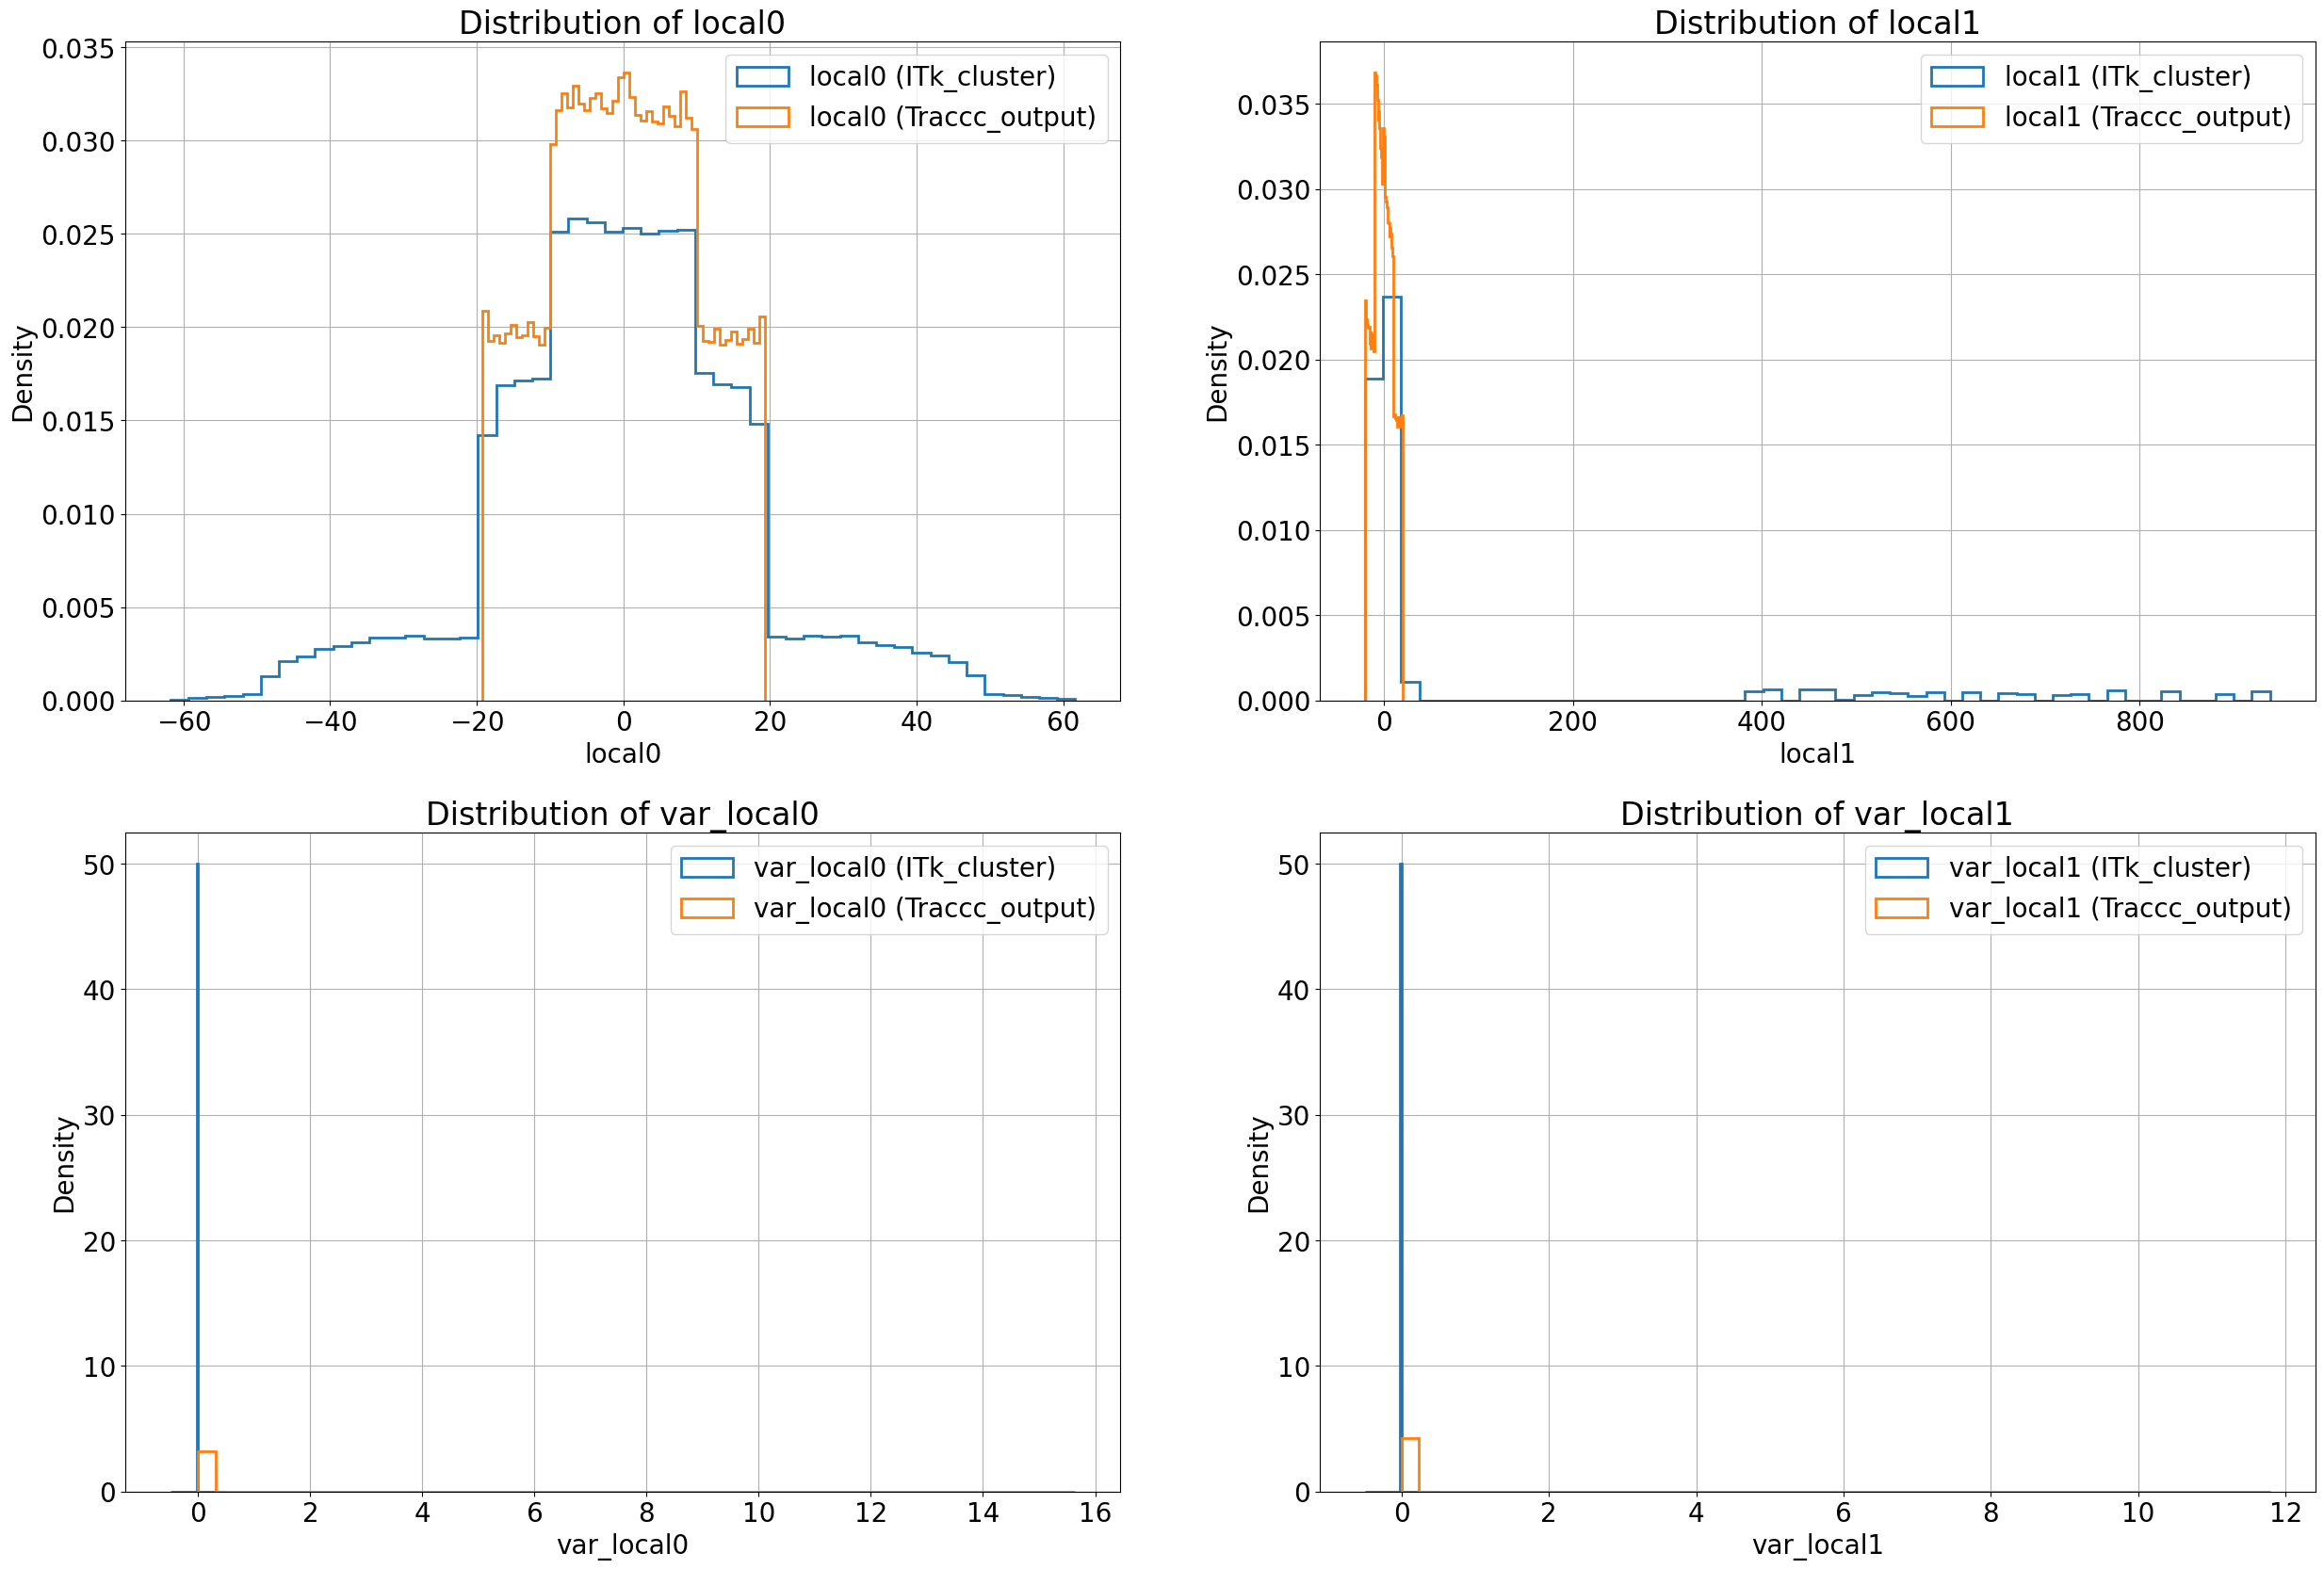

In [8]:
# Plotting
plt.figure(figsize=(30, 20))
for i in np.arange(1, len(columns_to_compare)):
    plt.subplot(220+i)
    column = columns_to_compare[i]
    plt.hist(ITk_cluster_selected[column], bins=50, histtype='step', linewidth=2, label=f'{column} (ITk_cluster)', density=True)
    plt.hist(Traccc_output_selected[column], bins=50, histtype='step', linewidth=2, label=f'{column} (Traccc_output)', density=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

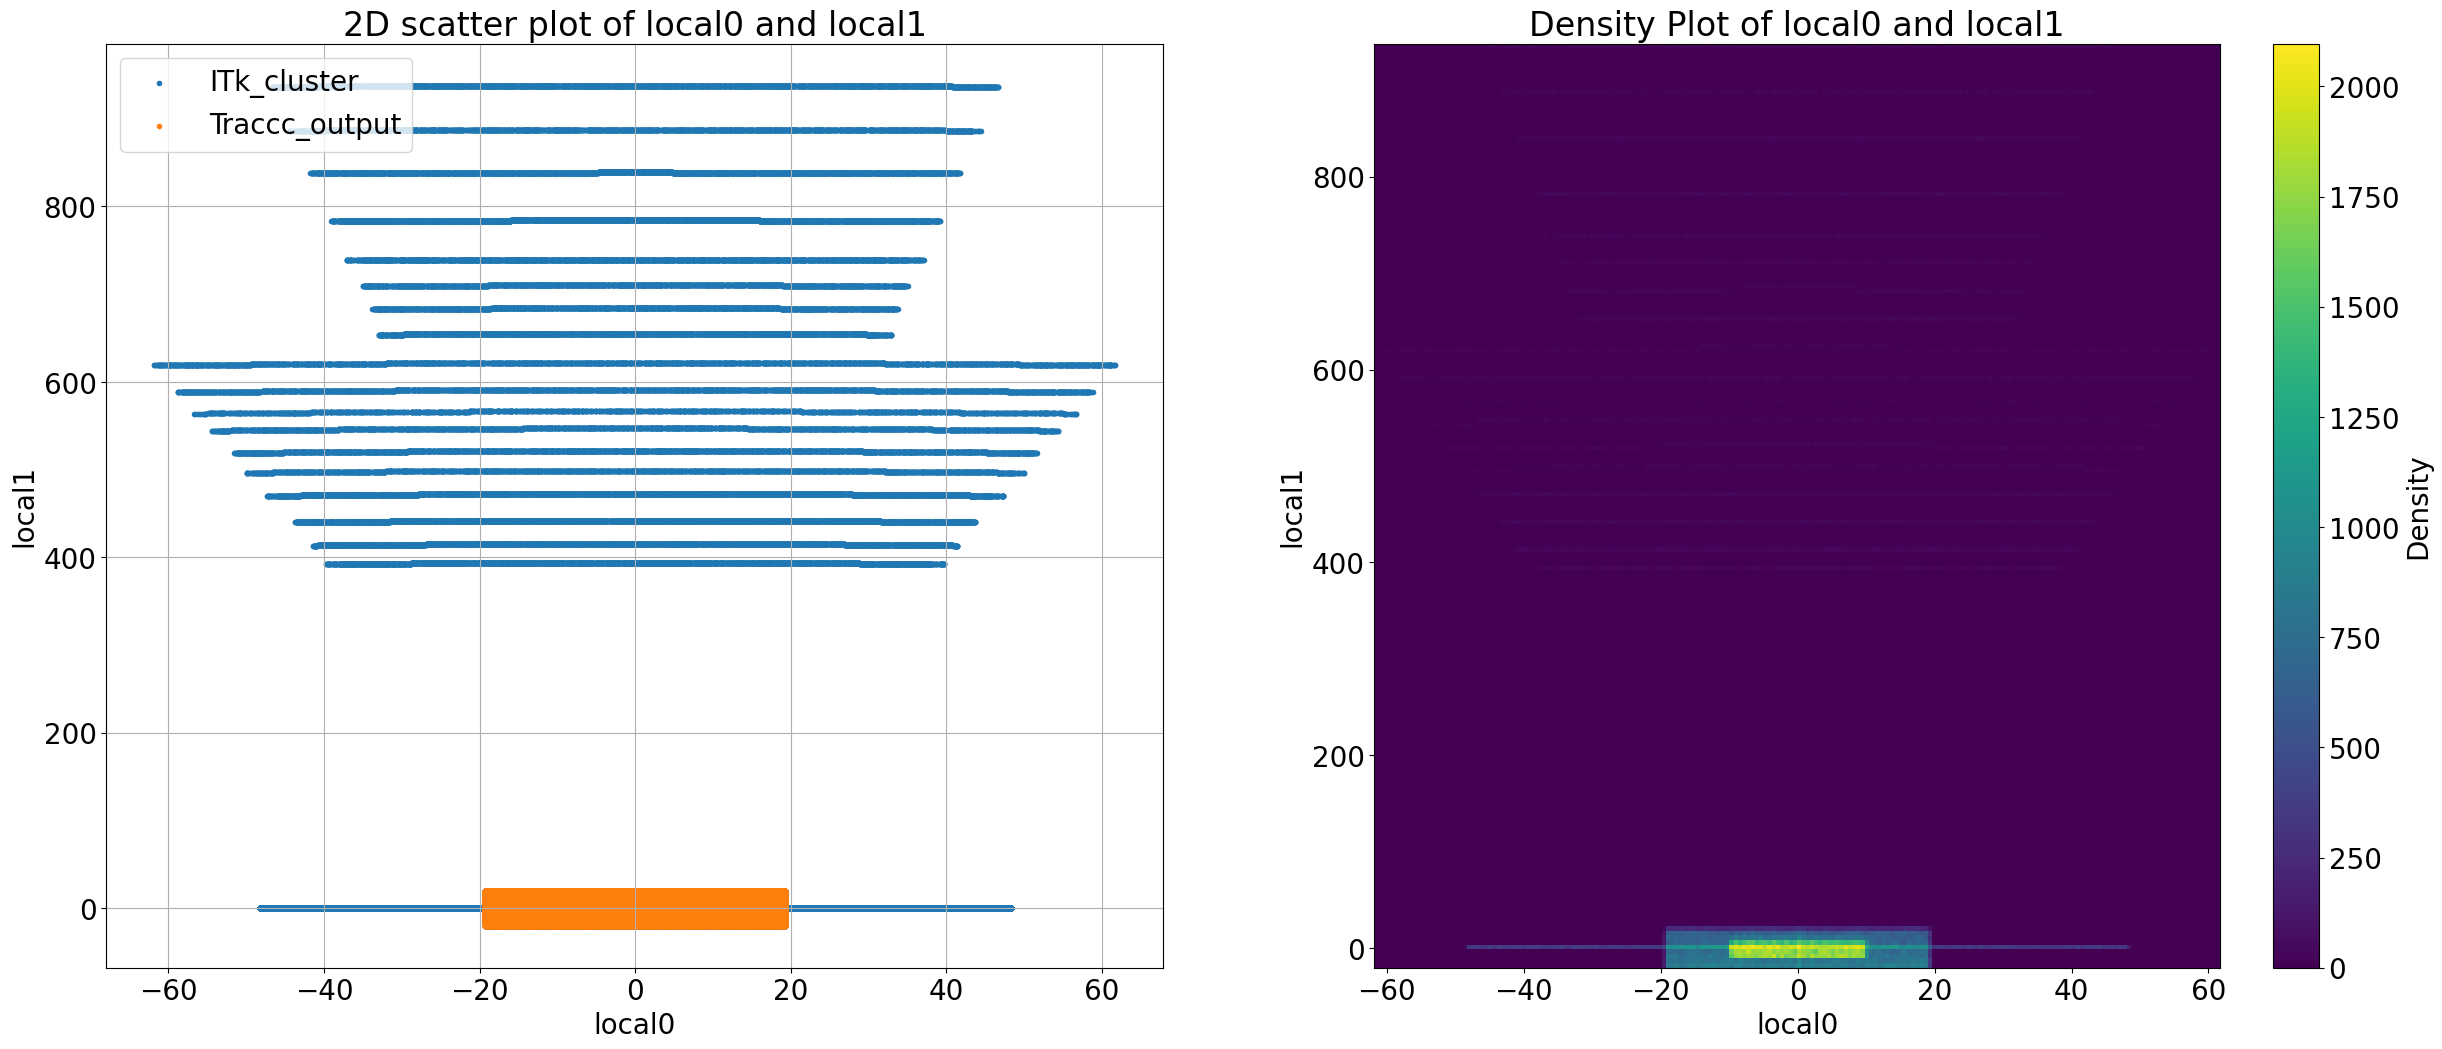

In [25]:
# 2D Graph
plt.figure(figsize=(30, 12))

plt.subplot(121)
plt.scatter(ITk_cluster_selected['local0'], ITk_cluster_selected['local1'], marker='.', label='ITk_cluster')
plt.scatter(Traccc_output_selected['local0'], Traccc_output_selected['local1'], marker='.', label='Traccc_output')
plt.xlabel('local0')
plt.ylabel('local1')
plt.grid(True)
plt.legend()
plt.title("2D scatter plot of local0 and local1")

plt.subplot(122)
local0 = np.concatenate([ITk_cluster_selected['local0'], Traccc_output_selected['local0']])
local1 = np.concatenate([ITk_cluster_selected['local1'], Traccc_output_selected['local1']])

plt.hist2d(local0, local1, bins=200, cmap='viridis')
plt.colorbar(label='Density')
plt.title("Density Plot of local0 and local1")

plt.xlabel('local0')
plt.ylabel('local1')

plt.show()
